# Importing all the neccessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading the dataset

In [2]:
A = pd.read_csv("/Users/vipulghare/Desktop/Data Science/Project work/CSV/insurance.csv")

# Preview the dataset

In [3]:
A.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Get information about the dataset

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



# Describe function will tell you more about the dataset

In [5]:
A.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Check for any null value


In [6]:
A.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis(EDA)

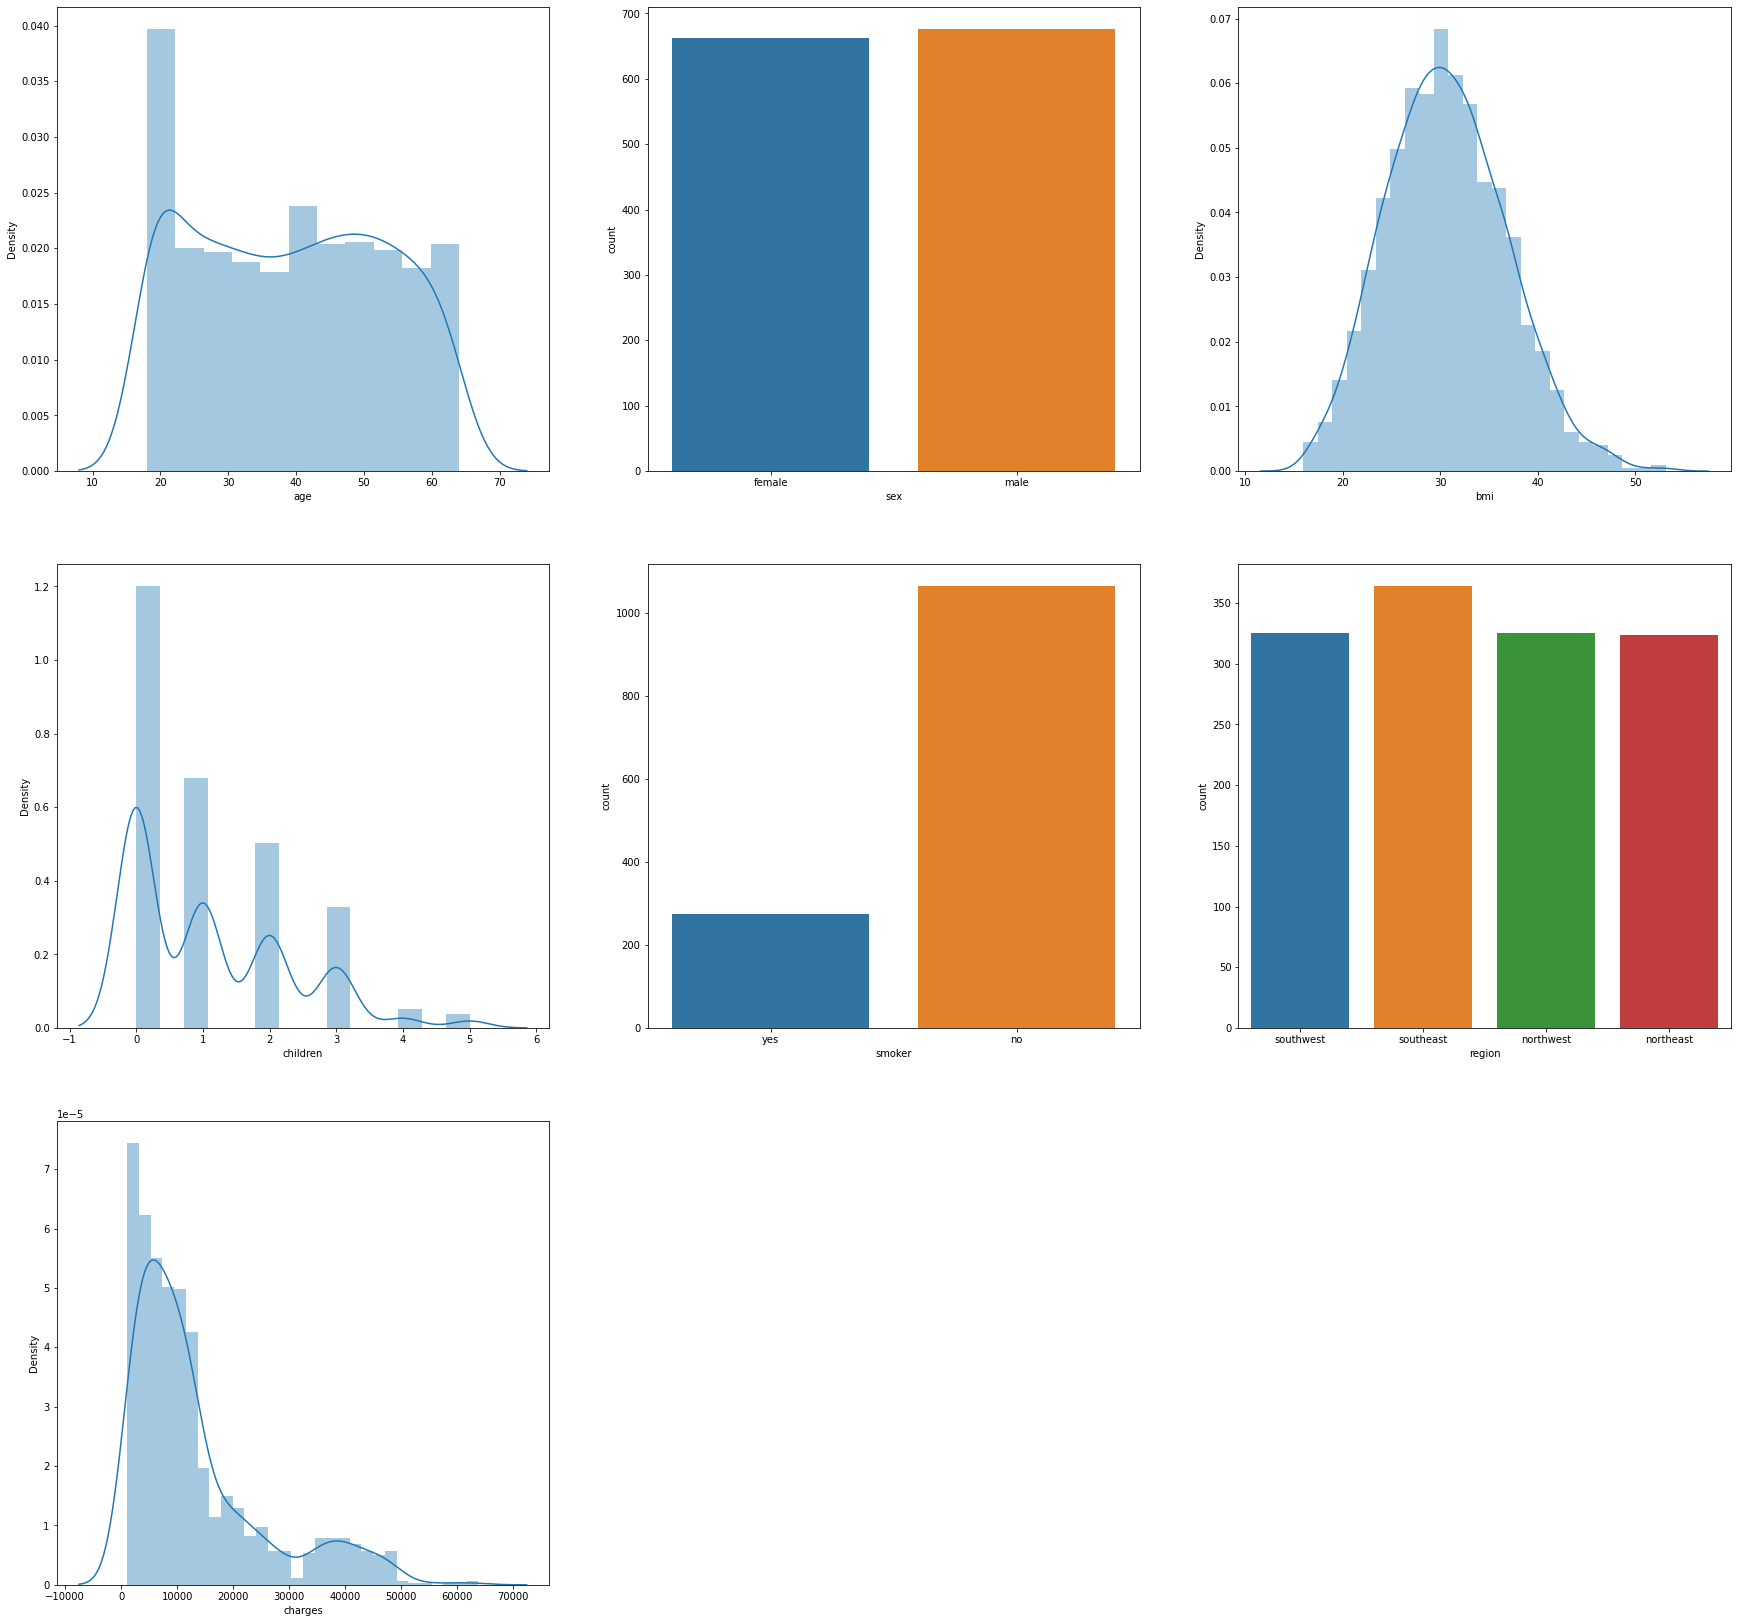

In [7]:
import seaborn as sb
import warnings as wr
wr.filterwarnings("ignore")
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

# Declare Predictor and Target varibale


In [8]:
Y = A[["charges"]]

In [9]:
X = A.drop(labels=["charges"],axis=1)

In [10]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [11]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# Categorical and Continous seperator

In [12]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [13]:
cat

['sex', 'smoker', 'region']

In [14]:
con

['age', 'bmi', 'children']

# Checking skew 

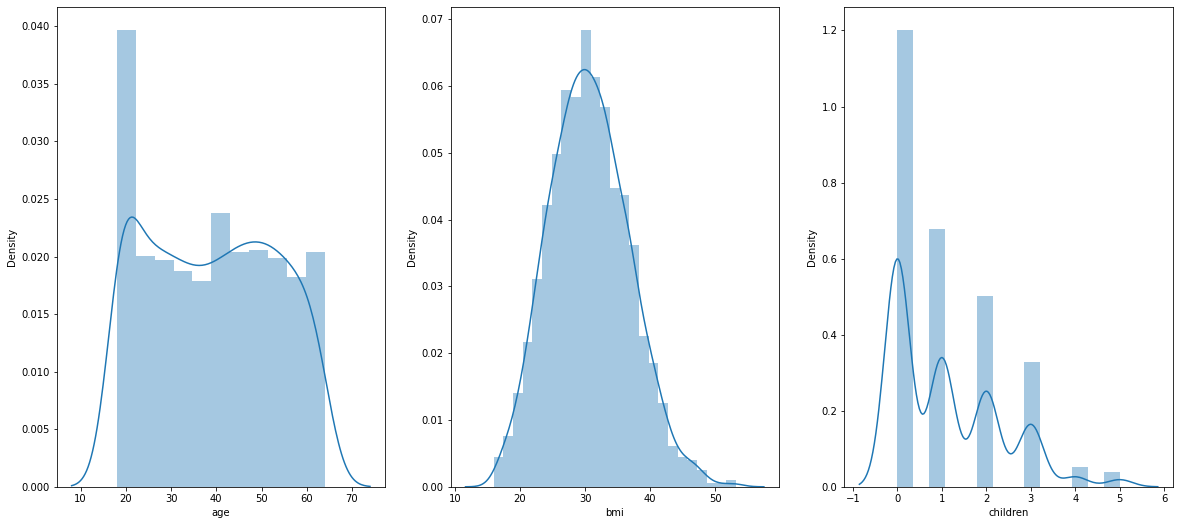

In [15]:
import seaborn as sb
plt.figure(figsize=(20,30))
m = 1
for i in X[con].columns:
    plt.subplot(X[con].shape[1],3,m)
    sb.distplot(X[i])
    m = m+1

In [16]:
for i in X[con]:
    print(i,X[i].skew())

age 0.05567251565299186
bmi 0.2840471105987448
children 0.9383804401702414


In [17]:
C = X[con]

In [18]:
C = C.drop(labels=["children"],axis=1)

In [19]:
C

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [20]:
D = X[cat]

In [21]:
D

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [22]:
D["children"] = A[["children"]]

In [23]:
D

,sex,smoker,region,children
0,female,yes,southwest,0
1,male,no,southeast,1
2,male,no,southeast,3
3,male,no,northwest,0
4,male,no,northwest,0
...,...,...,...,...
1333,male,no,northwest,3
1334,female,no,northeast,0
1335,female,no,southeast,0
1336,female,no,southwest,0


In [24]:
from sklearn.preprocessing import StandardScaler #standarize the data
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(C),columns=C.columns)

In [25]:
X1

,age,bmi
0,-1.438764,-0.453320
1,-1.509965,0.509621
2,-0.797954,0.383307
3,-0.441948,-1.305531
4,-0.513149,-0.292556
...,...,...
1333,0.768473,0.050297
1334,-1.509965,0.206139
1335,-1.509965,1.014878
1336,-1.296362,-0.797813


In [26]:
X2 = pd.get_dummies(D)

In [27]:
X = X1.join(X2)

In [28]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,1,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,3,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,0,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,3,0,1,1,0,0,1,0,0
1334,-1.509965,0.206139,0,1,0,1,0,1,0,0,0
1335,-1.509965,1.014878,0,1,0,1,0,0,0,1,0
1336,-1.296362,-0.797813,0,1,0,1,0,0,0,0,1


# Split the data in training and testing data

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)

# fit the data into linear model

In [30]:
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

# Calculation of Error of the model

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

4042.200173530823